In [9]:
# check for proper interpreter
import sys
sys.executable

'C:\\Users\\maggi\\anaconda3\\envs\\capstone4\\python.exe'

In [10]:
# set up paths for training data
import os
SCRIPT_PATH = os.path.dirname(os.path.realpath('__file__'))
OAHU_IMG_DIR = os.path.join(SCRIPT_PATH, 'data', 'Oahu_6545')
OAHU_IMG_DIR

'C:\\Users\\maggi\\01Jupyter\\amts-springboard-capstone\\data\\Oahu_6545'

In [11]:
# create variables for multi-spectral band TIFs
OAHU_B1 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B1.TIF')
OAHU_B2 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B2.TIF')
OAHU_B3 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B3.TIF')
OAHU_B4 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B4.TIF')
OAHU_B5 = os.path.join(OAHU_IMG_DIR, 'LC08_L2SP_065045_20150119_20200910_02_T1_SR_B5.TIF')

## EDA

#### Explore raster (image) band properties. 

In [13]:
# gdal is an open source library
import gdal

In [24]:
# open raster
_b1 = gdal.Open(os.path.abspath(OAHU_B1), gdal.GA_ReadOnly)

In [32]:
print('Band 1 (Aerosol)')
print(f'\tNumber of rows: {_b1.RasterYSize}')
print(f'\tNumber of columns: {_b1.RasterXSize}')
print(f'\tBands (should just be 1): {_b1.RasterCount}')
print(f'\tCoordinate System (WKT): {_b1.GetProjection()}')

Band 1 (Aerosol)
	Number of rows: 7761
	Number of columns: 7601
	Bands (should just be 1): 1
	Coordinate System (WKT): PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]


In [35]:
# verify all bands 2-5 are the same size and projection as band 1
_rasters = [OAHU_B2, OAHU_B3, OAHU_B4, OAHU_B5]
_band = 1
for _rstr in _rasters:
    _path = os.path.abspath(_rstr)
    _open = gdal.Open(os.path.abspath(OAHU_B1), gdal.GA_ReadOnly)
    print(f'Band: {_band + 1}')
    print(f'\tNumber of rows: {_open.RasterYSize}')
    print(f'\tNumber of columns: {_open.RasterXSize}')
    print(f'\tBands (should just be 1): {_open.RasterCount}')
    print(f'\tCoordinate System (WKT): {_open.GetProjection()}')
    _band = _band + 1

Band: 2
	Number of rows: 7761
	Number of columns: 7601
	Bands (should just be 1): 1
	Coordinate System (WKT): PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-159],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32604"]]
Band: 3
	Number of rows: 7761
	Number of columns: 7601
	Bands (should just be 1): 1
	Coordinate System (WKT): PROJCS["WGS 84 / UTM zone 4N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHO

In [16]:
# Visualize raster band images 
# Choose a random point on the rasters and make sure the points align... print an array maybe?
import matplotlib
import matplotlib.pyplot as plt
import rasterio

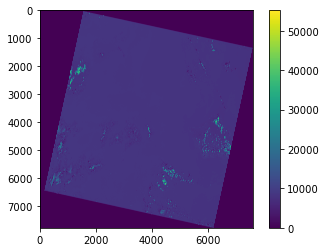

In [30]:
# Show band 1
_b1array = _b1.ReadAsArray()
plt.imshow(_b1array)
plt.colorbar()

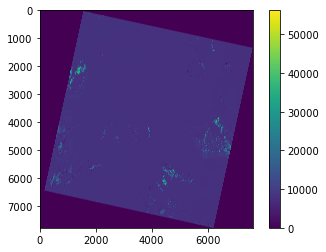

In [32]:
# Show band 2
_b2 = gdal.Open(os.path.abspath(OAHU_B2), gdal.GA_ReadOnly)
_b2array = _b2.ReadAsArray()
plt.imshow(_b2array)
plt.colorbar()

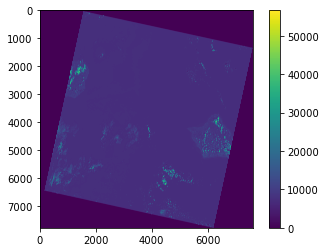

In [34]:
# Show band 3
_b3 = gdal.Open(os.path.abspath(OAHU_B3), gdal.GA_ReadOnly)
_b3array = _b3.ReadAsArray()
plt.imshow(_b3array)
plt.colorbar()

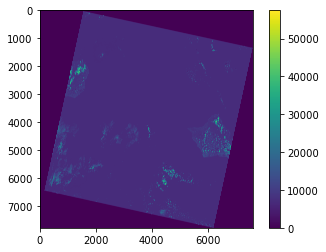

In [35]:
# Show band 4
_b4 = gdal.Open(os.path.abspath(OAHU_B4), gdal.GA_ReadOnly)
_b4array = _b4.ReadAsArray()
plt.imshow(_b4array)
plt.colorbar()

Text(0, 0.5, 'Row #')

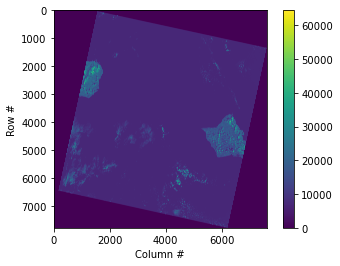

In [50]:
# Show band 5
_b5 = gdal.Open(os.path.abspath(OAHU_B5), gdal.GA_ReadOnly)
_b5array = _b5.ReadAsArray()
plt.imshow(_b5array)
plt.colorbar()
plt.xlabel('Column #')
plt.ylabel('Row #')

In [56]:
import numpy as np
_b5reshape = np.reshape(_b5array, [_b5.RasterYSize*_b5.RasterXSize])
_b5reshape

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [57]:
_b5reshape.size

58991361

In [64]:
# Hmmmm

## Wrangling

### Save pixel info in CSV

In [37]:
# TODO:
# Create 5,000 random points on the rasters and view them in dataframe or array
# save these to a csv

# Future question: how to extract same location info from lidar dataset?